# Exploring relationships without extreme outliers 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [3]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_2.csv'), index_col = False)


# Some cleaning and wrangling steps

### Changing data types and dropping columns

In [4]:
df_all.shape

(8785, 13)

In [5]:
df_all.head()

,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,Country category by emissions,GDP per cap. category
0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,Low emissions country,High GDP per cap.
1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,Low emissions country,High GDP per cap.
2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,Low emissions country,High GDP per cap.
3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,Low emissions country,High GDP per cap.
4,4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN,2373000.0,Above-Moderate emissions country,NaN


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8785 non-null   int64  
 1   Country                        8785 non-null   object 
 2   Year                           8785 non-null   int64  
 3   Type of emissions              8785 non-null   object 
 4   Gas type                       8785 non-null   object 
 5   Emissions quantity, tonnes     8785 non-null   float64
 6   Total population, thousands    8120 non-null   float64
 7   Population density             8120 non-null   float64
 8   GDP per capita                 7210 non-null   float64
 9   WMG                            2625 non-null   float64
 10  Emissions by year & country    8785 non-null   float64
 11  Country category by emissions  8785 non-null   object 
 12  GDP per cap. category          7210 non-null   o

In [7]:
#Changing data type of 'Year'
df_all['Year'] = df_all['Year'].astype('str')

In [8]:
#Deleting column 'Unnnamed: 0'

df_all = df_all.drop(columns=['Unnamed: 0'])


In [9]:
df_all['Emissions quantity, tonnes'].value_counts()

0.0           4249
13608000.0      18
1302000.0       12
1159200.0       11
873600.0        10
              ... 
42400.0          1
1187200.0        1
3561600.0        1
41200.0          1
341880.0         1
Name: Emissions quantity, tonnes, Length: 1840, dtype: int64

### Removing 0.0 values in 'Emissions quantity, tonnes'

In [10]:
values_to_remove = [0.0] 

In [11]:
#Removing 0.0 values from the column 
df_all = df_all[~df_all['Emissions quantity, tonnes'].isin(values_to_remove)]

In [12]:
df_all['Emissions quantity, tonnes'].value_counts()

13608000.0    18
1302000.0     12
1159200.0     11
10164000.0    10
131000.0      10
              ..
42400.0        1
1187200.0      1
3561600.0      1
41200.0        1
341880.0       1
Name: Emissions quantity, tonnes, Length: 1839, dtype: int64

In [13]:
df_all.shape #More than a half of df removed

(4536, 12)

# Defining outliers

## Outliers for 'Total population' column

In [14]:
std_dev = df_all['Total population, thousands'].std()

In [15]:
mean = df_all['Total population, thousands'].mean()

In [16]:
upper_bound = mean + (2 * std_dev)

In [17]:
upper_bound

316731.4274845902

In [18]:
max_value = 316731.4274845902


In [19]:
outliers = df_all[(df_all['Total population, thousands'] < mean - 2 * std_dev) | (df_all['Total population, thousands'] > mean + 2 * std_dev)]


In [20]:
outliers.shape

(63, 12)

In [21]:
#removing outliers 

df_all = df_all[df_all['Total population, thousands'] <= max_value]


In [22]:
df_all.shape

(4347, 12)

## Outliers for 'Emissions quantity'

In [23]:
std_dev = df_all['Emissions quantity, tonnes'].std()

In [24]:
mean = df_all['Emissions quantity, tonnes'].mean()

In [25]:
upper_bound_1= mean + (2 * std_dev)

In [26]:
upper_bound_1

36635630.977137096

In [27]:
max_value_1 = 36635630.977137096


In [28]:
#removing outliers 
df_all = df_all[df_all['Emissions quantity, tonnes'] <= max_value_1]


In [29]:
df_all.shape #The original df got smaller by approx. 300 observations

(4220, 12)

# Exploring relationships

## Correlation

In [30]:
df_all.corr()

/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_5197/738805462.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.corr()


,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country
"Emissions quantity, tonnes",1.000000,0.369393,-0.023694,0.053432,0.148523,0.348281
"Total population, thousands",0.369393,1.000000,-0.044216,-0.121736,-0.034741,0.576968
Population density,-0.023694,-0.044216,1.000000,0.280148,0.162769,-0.037928
GDP per capita,0.053432,-0.121736,0.280148,1.000000,0.647502,0.021314
WMG,0.148523,-0.034741,0.162769,0.647502,1.000000,0.202922
Emissions by year & country,0.348281,0.576968,-0.037928,0.021314,0.202922,1.000000


## Creating a corr. heatmap using matplotlib

/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_5197/3721441540.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_all.corr())


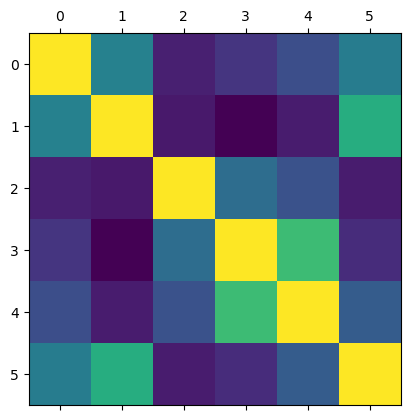

In [31]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_all.corr())
plt.show()

/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_5197/529996413.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_all.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

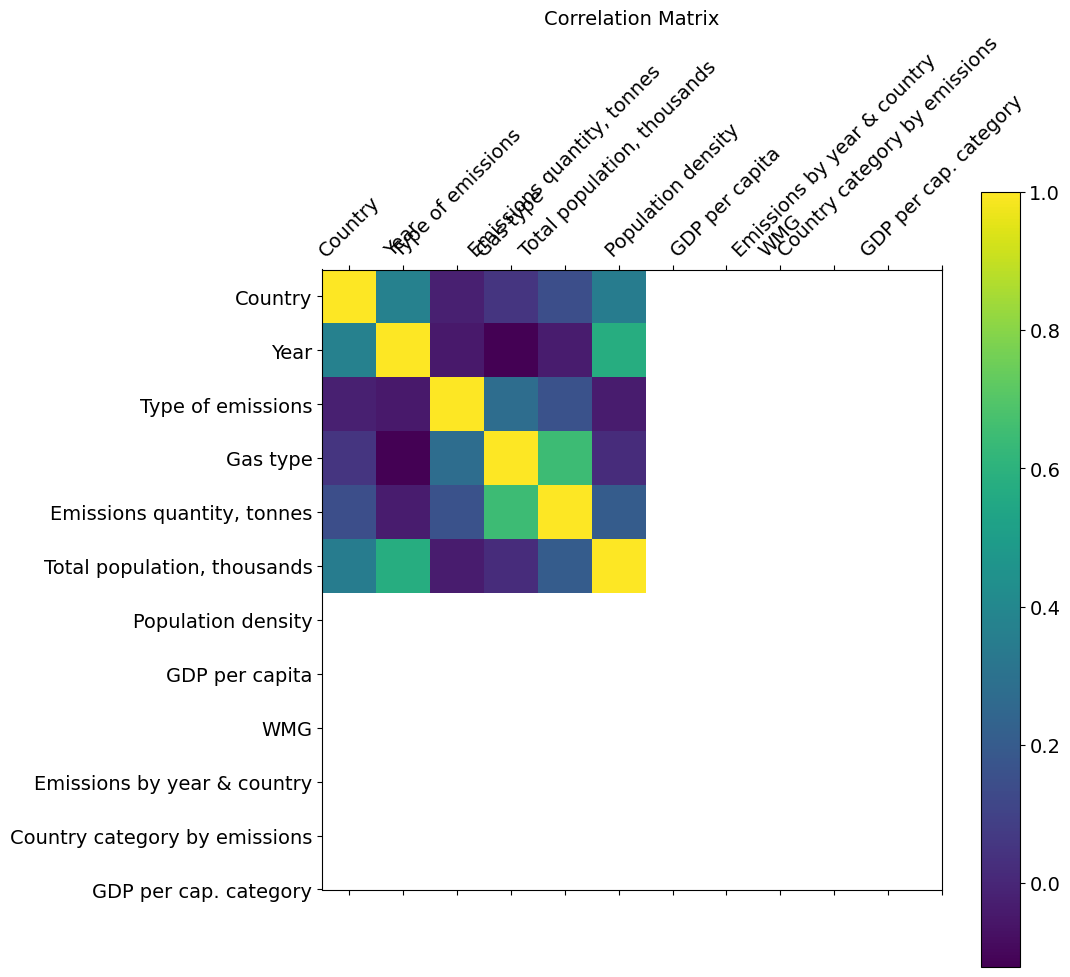

In [32]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_all.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_all.shape[1]), df_all.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_all.shape[1]), df_all.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Creating a correlation map using seaborn

In [33]:
# Create a subset excluding the "Country", "Year", 'Type of emissions', 'Gas type' columns

sub_2 = df_all[['Emissions quantity, tonnes', 'Emissions by year & country', 'Total population, thousands', 'Population density', 'GDP per capita', 'WMG']]

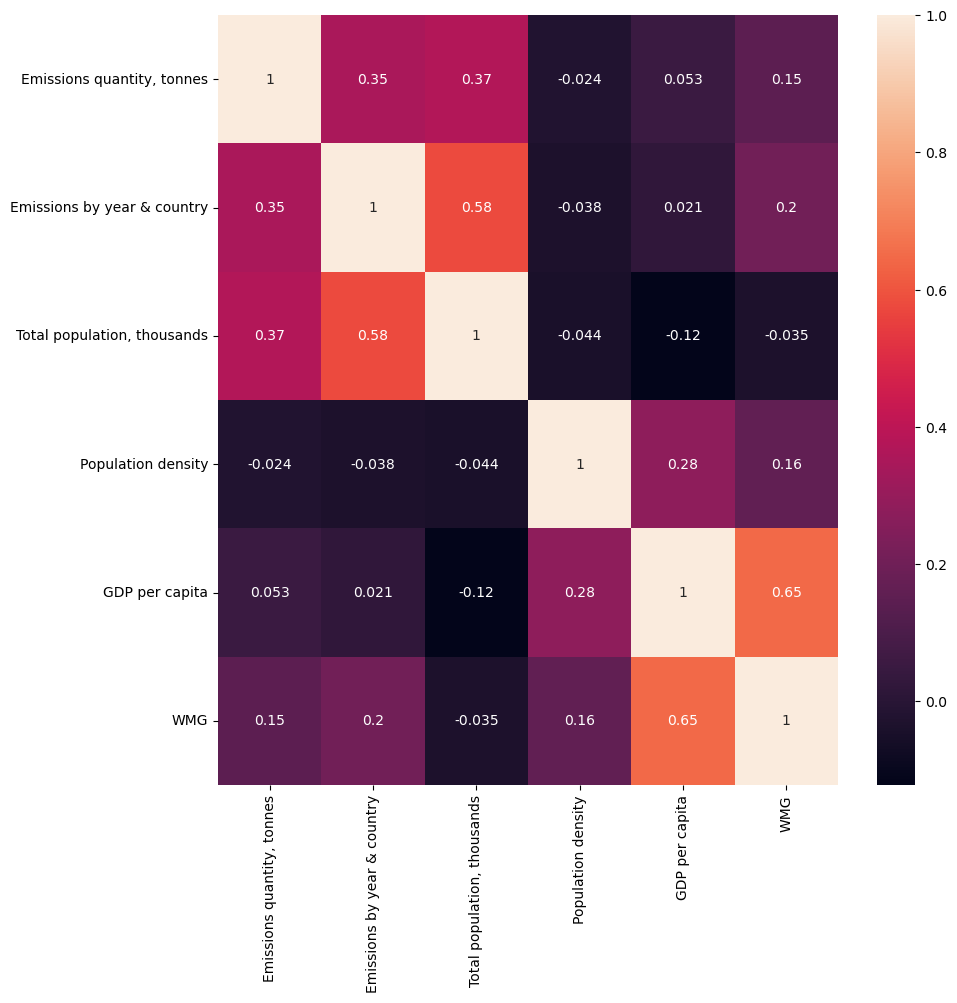

In [34]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

**There is a moderate positive correlation between Emissions quantity and Total population, as well as between Population density and GDP per capita. There is a strong correlation between Emissions by year & country and Total population. There is a strong positive correlation between GDP per capita and WMG index, which assumes that countries with higher GDP per capita invest more into and are more successful at waste management. There is a very weak negative correlation between Total population and GDP per capita, which means that as population grows, the GDP gets lower and vice versa. There is a weak correlation between Emissions and WMG index, and almost no relationship between emissions and GDP per capita. However, one should take into consideration that a lot of WMG and GDP data points are missing!**

## Creating scatterplots

### Emissions quantity, total & Total population

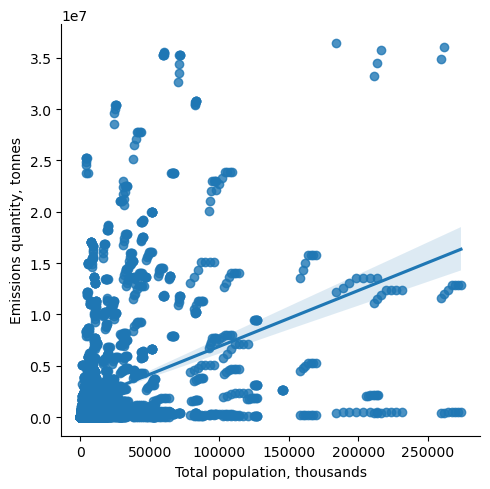

In [35]:
#Emissions quantity & Total population
sns.lmplot(x = 'Total population, thousands', y = 'Emissions quantity, tonnes', data = df_all)

### Emissions by year and country & Total population


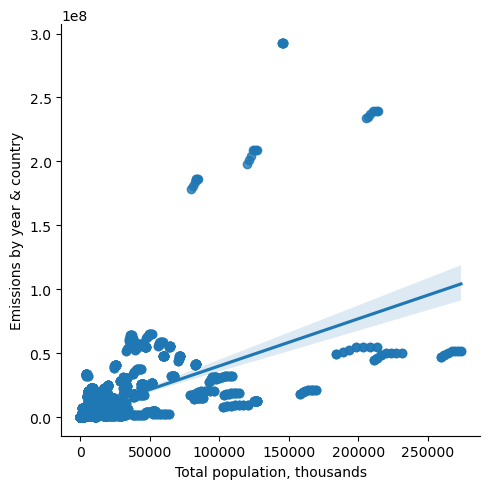

In [36]:
#Emissions by year & country & Total population
sns.lmplot(x = 'Total population, thousands', y = 'Emissions by year & country', data = df_all)

# Creating a pair plot

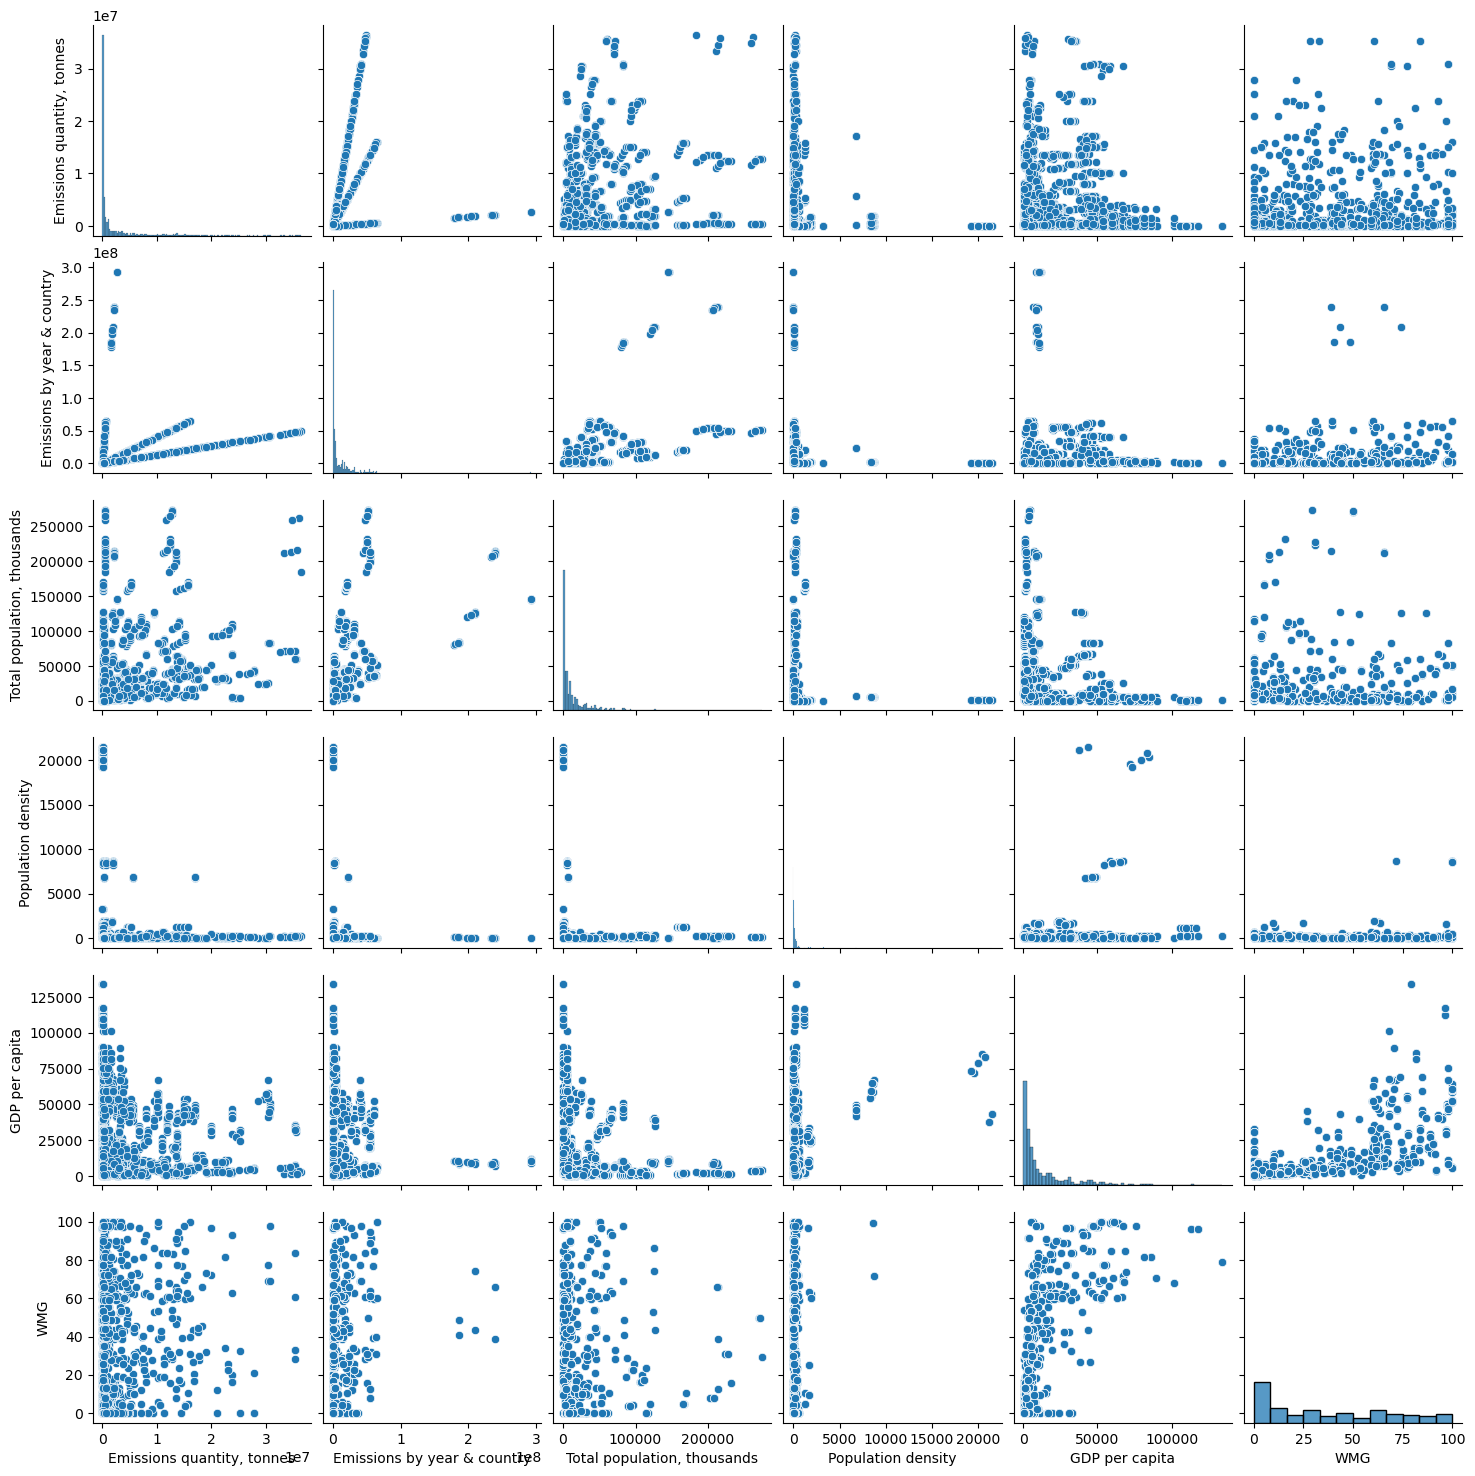

In [37]:
# Create a pair plot 

g = sns.pairplot(sub_2)

## Creating further scatterplots

### WMG & GDP per capita

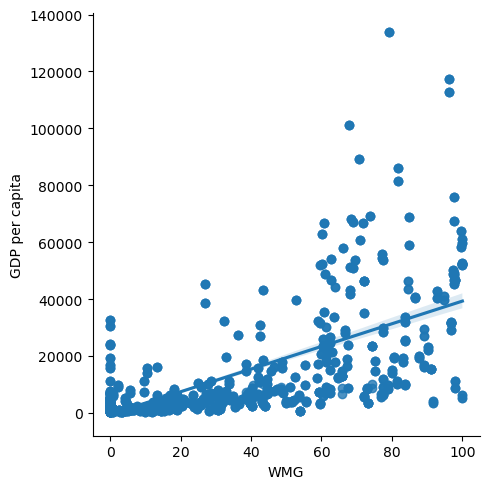

In [38]:
#WMG & GDP per capita
sns.lmplot(x = 'WMG', y = 'GDP per capita', data = df_all)

### Population density and GPD per capita

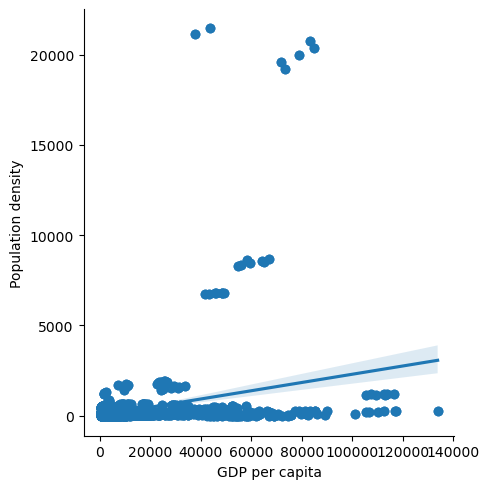

In [39]:
sns.lmplot(x = 'GDP per capita', y = 'Population density', data = df_all)

### WMG and emissions by year & country

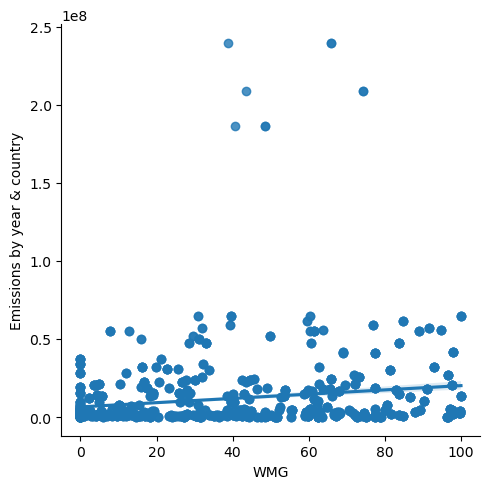

In [40]:
sns.lmplot(x = 'WMG', y = 'Emissions by year & country', data = df_all)

# Categorical plots

<Axes: xlabel='Emissions quantity, tonnes', ylabel='Count'>

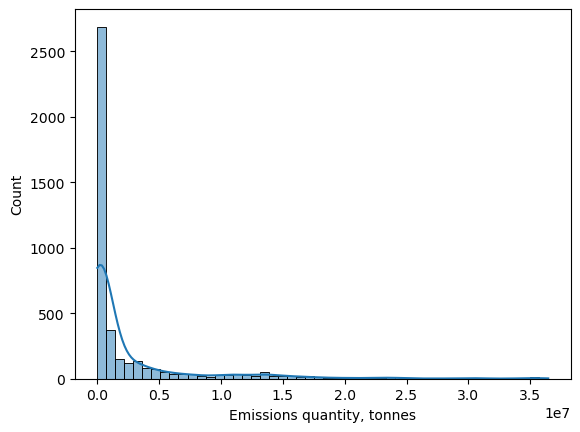

In [41]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Emissions quantity, tonnes'], bins = 50, kde = True)

<Axes: xlabel='Emissions by year & country', ylabel='Count'>

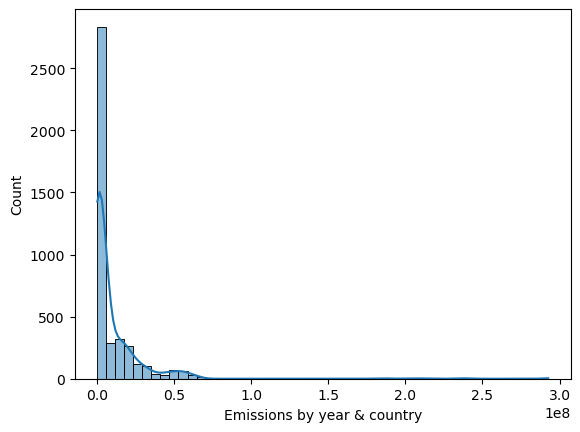

In [42]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Emissions by year & country'], bins = 50, kde = True)

<Axes: xlabel='GDP per capita', ylabel='Count'>

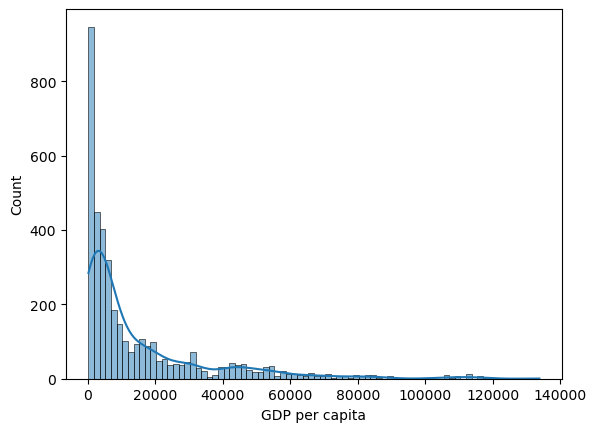

In [43]:
sns.histplot(df_all['GDP per capita'], bins = 80, kde = True)

## Dropping the old column 'Country category by emissions' to create new flags

In [44]:
df_all = df_all.drop(columns=['Country category by emissions'])

## Calculating statistics for Emissions by year & country

In [45]:
std_dev = df_all['Emissions by year & country'].std()

In [46]:
mean = df_all['Emissions by year & country'].mean()

In [47]:
one_st_dev_away = mean + std_dev

In [48]:
mean

10075080.189582938

In [49]:
one_st_dev_away

32835618.07473553

In [50]:
min = df_all['Emissions by year & country'].min()

In [51]:
min

436.18

In [52]:
two_st_dev_away = mean + (2*std_dev)

In [53]:
two_st_dev_away

55596155.959888116

In [54]:
max = df_all['Emissions by year & country'].max()

In [55]:
max

292670000.0

In [56]:
q1 = df_all['Emissions by year & country'].quantile(0.25)
q2 = df_all['Emissions by year & country'].quantile(0.50)
q3 = df_all['Emissions by year & country'].quantile(0.75)

In [57]:
q1


393240.0

In [58]:
q2

2067900.0

In [59]:
q3

12797250.0

In [60]:
three_st_dev_away = mean + (3*std_dev)

In [61]:
three_st_dev_away

78356693.84504071

##  Creating flags for the column "Country category by emissions'

In [62]:
df_all.loc[(df_all['Emissions by year & country'] >= min) & (df_all['Emissions by year & country'] <= q1), 'Country category by emissions'] = 'Low emissions country'


In [63]:
df_all.loc[(df_all['Emissions by year & country'] > q1) & (df_all['Emissions by year & country'] <= q2), 'Country category by emissions'] = 'Insignificant emissions country'


In [64]:
df_all.loc[(df_all['Emissions by year & country'] > q2) & (df_all['Emissions by year & country'] <= mean), 'Country category by emissions'] = 'Moderate emissions country'


In [65]:
df_all.loc[(df_all['Emissions by year & country'] > mean) & (df_all['Emissions by year & country'] <= two_st_dev_away), 'Country category by emissions'] = 'High emissions country'


In [66]:
df_all.loc[df_all['Emissions by year & country'] > two_st_dev_away, 'Country category by emissions'] = 'Extreme emissions country'


In [67]:
df_all['Country category by emissions'].value_counts()

High emissions country             1067
Low emissions country              1065
Insignificant emissions country    1050
Moderate emissions country          948
Extreme emissions country            90
Name: Country category by emissions, dtype: int64

##  Calculating statistics for the column "GDP per capita"

In [68]:
std_dev_1 = df_all['GDP per capita'].std()

In [69]:
mean_1 = df_all['GDP per capita'].mean()

In [70]:
std_dev_1

20596.388743601125

In [71]:
mean_1

15042.829852266937

In [72]:
one_st_dev_away_1 = mean_1 + std_dev_1

In [73]:
one_st_dev_away_1

35639.218595868064

In [74]:
min_1 = df_all['GDP per capita'].min()

In [75]:
min_1

262.0

In [76]:
two_st_dev_away_1 = mean_1 + (2*std_dev_1)

In [77]:
two_st_dev_away_1

56235.607339469185

In [78]:
max_1 = df_all['GDP per capita'].max()

In [79]:
max_1

133745.0

In [80]:
q1_1 = df_all['GDP per capita'].quantile(0.25)
q2_1 = df_all['GDP per capita'].quantile(0.50)
q3_1 = df_all['GDP per capita'].quantile(0.75)

In [81]:
q1_1

2025.0

In [82]:
q2_1

6094.0

In [83]:
q3_1

19002.0

## Creating flags for the new column 'GDP per cap. category"

In [84]:
df_all.loc[(df_all['GDP per capita'] >= min_1) & (df_all['GDP per capita'] <= q1_1), 'GDP per cap. category'] = 'Low GDP per cap.'


In [85]:
df_all.loc[(df_all['GDP per capita'] > q1_1) & (df_all['GDP per capita'] <= q2_1), 'GDP per cap. category'] = 'Low-middle GDP per cap.'


In [86]:
df_all.loc[(df_all['GDP per capita'] > q2_1) & (df_all['GDP per capita'] <= mean_1), 'GDP per cap. category'] = 'Middle GDP per cap.'


In [87]:
df_all.loc[(df_all['GDP per capita'] > mean_1) & (df_all['GDP per capita'] <= one_st_dev_away_1), 'GDP per cap. category'] = 'Upper-Middle GDP per cap.'


In [88]:
df_all.loc[(df_all['GDP per capita'] > one_st_dev_away_1) & (df_all['GDP per capita'] <= two_st_dev_away_1), 'GDP per cap. category'] = 'High GDP per cap.'


In [89]:
df_all.loc[df_all['GDP per capita'] > two_st_dev_away_1, 'GDP per cap. category'] = 'Extremely high GDP per cap.'

In [90]:
df_all['GDP per cap. category'].value_counts()

Low GDP per cap.               984
Low-middle GDP per cap.        981
Middle GDP per cap.            738
Upper-Middle GDP per cap.      694
High GDP per cap.              325
Extremely high GDP per cap.    204
Name: GDP per cap. category, dtype: int64

## Creating categorical plots

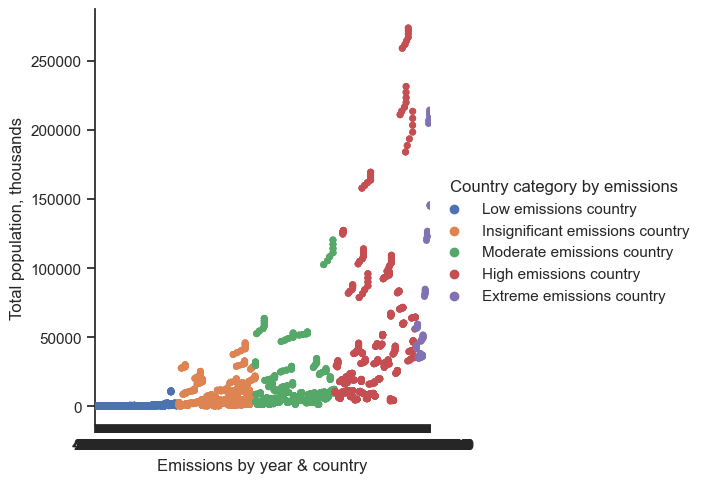

In [91]:

sns.set(style="ticks")
g = sns.catplot(x="Emissions by year & country", y="Total population, thousands", hue="Country category by emissions", data=df_all)

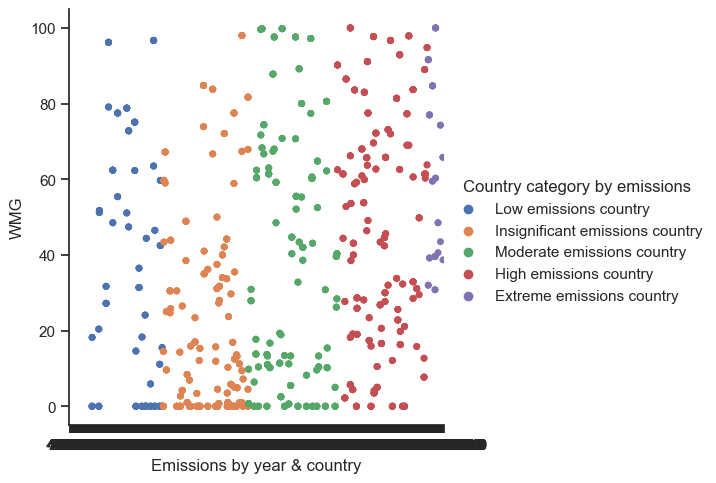

In [92]:

sns.set(style="ticks")
g = sns.catplot(x="Emissions by year & country", y="WMG", hue="Country category by emissions", data=df_all)

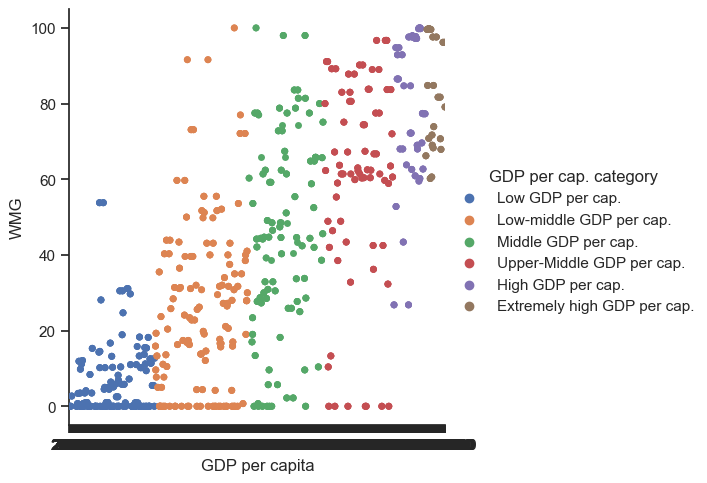

In [93]:


sns.set(style="ticks")
g_1 = sns.catplot(x="GDP per capita", y="WMG", hue="GDP per cap. category", data=df_all)

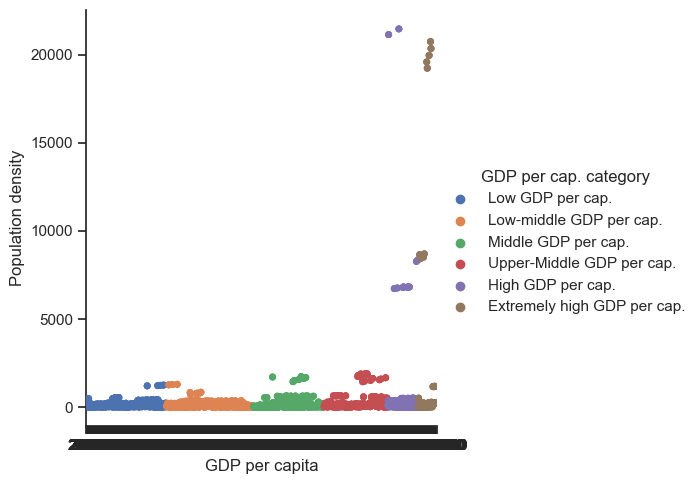

In [94]:


sns.set(style="ticks")
g_1 = sns.catplot(x="GDP per capita", y="Population density", hue="GDP per cap. category", data=df_all)

In [95]:
#Missing values
df_all.isnull().sum()

Country                             0
Year                                0
Type of emissions                   0
Gas type                            0
Emissions quantity, tonnes          0
Total population, thousands         0
Population density                  0
GDP per capita                    294
WMG                              2759
Emissions by year & country         0
GDP per cap. category             294
Country category by emissions       0
dtype: int64